# Import Lib

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report ,accuracy_score ,  confusion_matrix , precision_score , recall_score

# Preprocessing

In [61]:
data = pd.read_csv('KNN_Project_Data')

In [62]:
data

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [64]:
data.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [65]:
data.drop_duplicates(inplace=True)

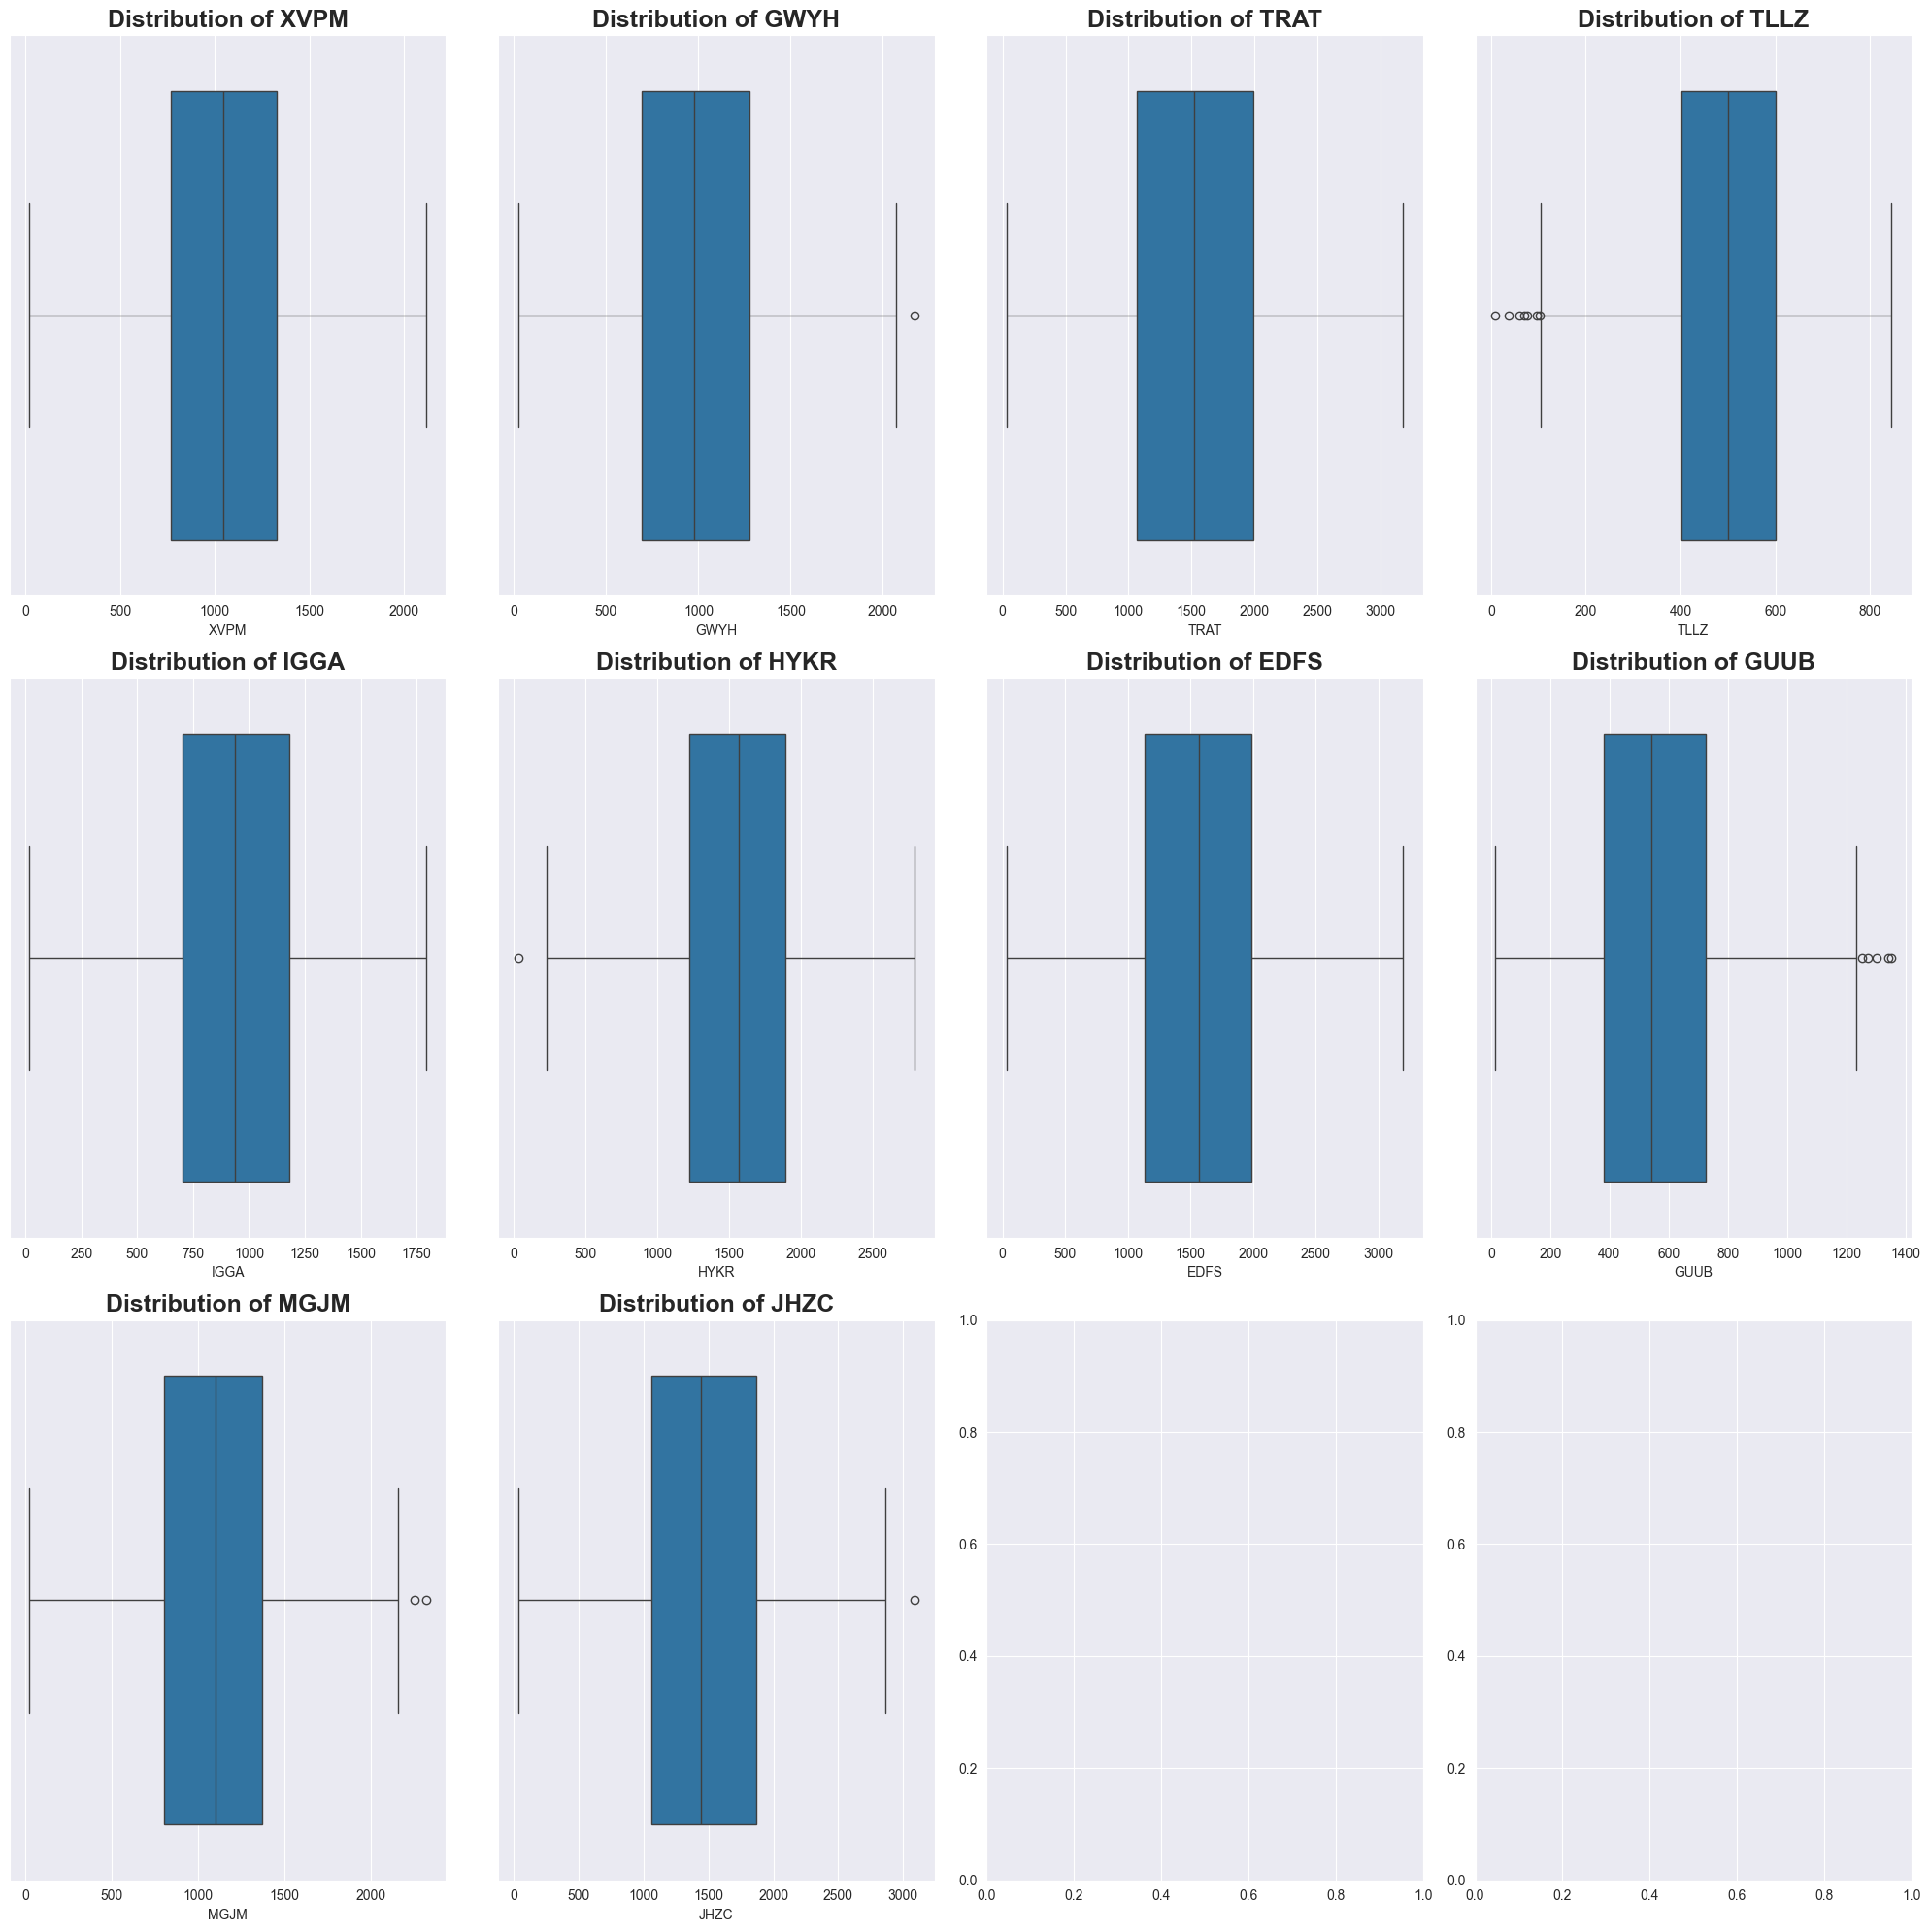

In [66]:
fig, axs = plt.subplots(3, 4, figsize=(20, 20))
columns = ['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM', 'JHZC']

for i, col in enumerate(columns):
    ax = axs[i//4, i%4]
    sns.boxplot(x=col, ax=ax, data=data)
    ax.set_title(f"Distribution of {col}", size=18, weight="bold")

plt.tight_layout()
plt.show()


In [67]:
X = data.drop('TARGET CLASS', axis=1)
y =data['TARGET CLASS']

In [68]:
# split data into train , val and test
# 1. split data into train 80 % , test 20%
X_train , x_test , y_train , y_test = train_test_split(X , y  ,test_size=0.2 ,random_state=42)

# 2. split train data into 70% train , 10 % val
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train   , test_size=0.1 , random_state=42)


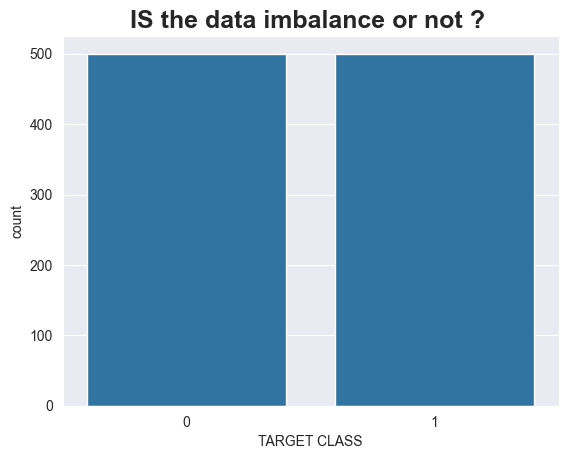

In [69]:
sns.countplot(data, x='TARGET CLASS')
plt.title("IS the data imbalance or not ? ", size=18, weight="bold")
plt.show()

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_train)
X_val =  scaler.transform(X_val)

C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model

In [71]:
# load knn model
knn = KNeighborsClassifier()

# train_model
knn.fit(X_train , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [72]:
y_pred_train = knn.predict(X_train)

In [73]:
# measure performance model on train data
print(classification_report(y_train ,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       359
           1       0.85      0.86      0.86       361

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720



In [74]:
print("Accuracy Score: ", accuracy_score(y_train ,y_pred_train))
print("Precision Score", precision_score(y_train ,y_pred_train))
print("Recall Score: ", recall_score(y_train ,y_pred_train))

Accuracy Score:  0.8541666666666666
Precision Score 0.8478260869565217
Recall Score:  0.8642659279778393


In [75]:
# confusion_matrix on train data
cm = confusion_matrix(y_train , y_pred_train)
cm

array([[303,  56],
       [ 49, 312]])

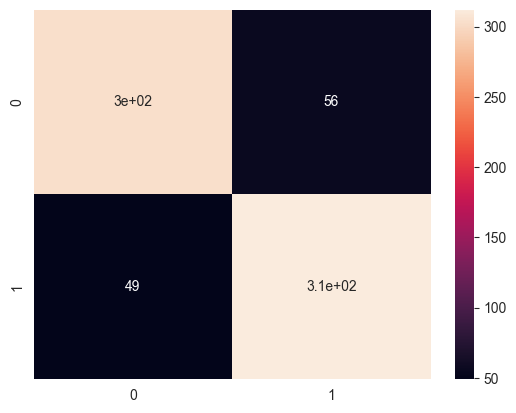

In [76]:
sns.heatmap(cm, annot=True)
plt.show()

In [77]:
y_pred_val = knn.predict(X_val)

In [78]:
# measure performance model on val data
print(classification_report(y_val ,y_pred_val))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.88      0.90      0.89        39

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



In [79]:
print("Accuracy Score: ", accuracy_score(y_val ,y_pred_val))
print("Precision Score", precision_score(y_val ,y_pred_val))
print("Recall Score: ", recall_score(y_val ,y_pred_val))

Accuracy Score:  0.8875
Precision Score 0.875
Recall Score:  0.8974358974358975


In [80]:
# confusion_matrix on train data
cm_val = confusion_matrix(y_val ,y_pred_val)
cm_val

array([[36,  5],
       [ 4, 35]])

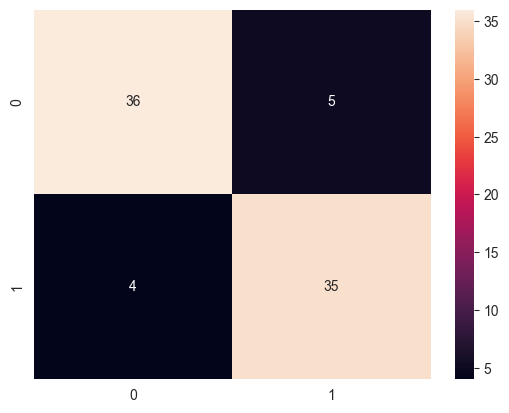

In [81]:
sns.heatmap(cm_val, annot=True)
plt.show()

# Grid Search

In [82]:
# define model with parameters
knn_model = KNeighborsClassifier()

param = {
    'n_neighbors':list(range(1 , 30)),
    'p':[1 , 2]
}

# train gridsearch
grid = GridSearchCV(knn_model , param)

# train gridsearch
grid.fit(X_train , y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...], 'p': [1, 2]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,12


In [83]:
knn_best = KNeighborsClassifier(n_neighbors= 12, p= 2)

knn_best.fit(X_train , y_train)

,n_neighbors,12
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [84]:
y_pred_train_best  = knn_best.predict(X_train)

In [85]:
# # measure performance model on train data
print(classification_report(y_train ,y_pred_train_best))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       359
           1       0.86      0.84      0.85       361

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720



In [86]:
print('accuracy_score:',accuracy_score(y_train , y_pred_train_best))
print('precision_score:',precision_score(y_train , y_pred_train_best))
print('recall_score:',recall_score(y_train , y_pred_train_best))

accuracy_score: 0.85
precision_score: 0.8603988603988604
recall_score: 0.8365650969529086


In [88]:
y_pred_val_best = knn_best.predict(X_val)

In [89]:
# measure performance model on val data
print(classification_report(y_val ,y_pred_val_best))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.82      0.82      0.82        39

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



In [91]:
print('accuracy_score:',accuracy_score(y_val , y_pred_val_best))
print('precision_score:',precision_score(y_val , y_pred_val_best))
print('recall_score:',recall_score(y_val , y_pred_val_best))

accuracy_score: 0.825
precision_score: 0.8205128205128205
recall_score: 0.8205128205128205


In [93]:
scores = []
for k in range(1 , 30): # k = 2
    model = KNeighborsClassifier(n_neighbors=k )
    model.fit(X_train , y_train)
    scores.append(model.score(X_val , y_val)) # cal accuracy

In [94]:
max(scores)

0.8875

Text(0, 0.5, 'scores')

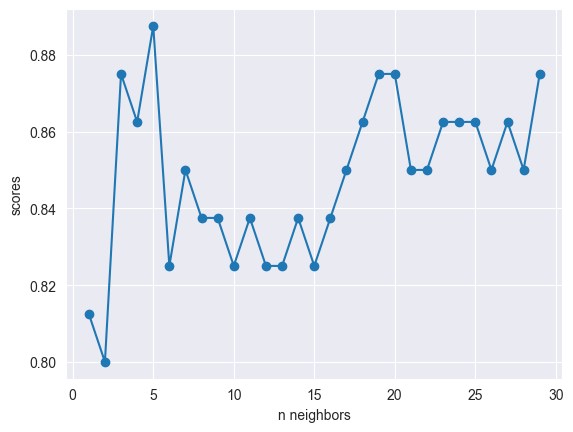

In [95]:
plt.plot(range(1 , 30) , scores , marker = 'o')
plt.xlabel('n neighbors')
plt.ylabel('scores')

In [ ]:
# retrain model when k = 5

In [96]:
knn_model_final = KNeighborsClassifier(n_neighbors=5)
knn_model_final.fit(X_train , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [97]:
y_pred_train_final = knn_model_final.predict(X_train)

In [98]:
print(classification_report(y_train , y_pred_train_final))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       359
           1       0.85      0.86      0.86       361

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720



In [99]:
print('accuracy_score:',accuracy_score(y_train , y_pred_train_final))
print('precision_score:',precision_score(y_train , y_pred_train_final))
print('recall_score:',recall_score(y_train , y_pred_train_final))


accuracy_score: 0.8541666666666666
precision_score: 0.8478260869565217
recall_score: 0.8642659279778393


In [100]:
y_pred_val_final = knn_model_final.predict(X_val)

In [101]:
print(classification_report(y_val  , y_pred_val_final))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.88      0.90      0.89        39

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



In [102]:
print('accuracy_score:',accuracy_score(y_val , y_pred_val_final))
print('precision_score:',precision_score(y_val , y_pred_val_final))
print('recall_score:',recall_score(y_val , y_pred_val_final))


accuracy_score: 0.8875
precision_score: 0.875
recall_score: 0.8974358974358975
